# **기말고사(20250613)**
학번 : 2021146034            
성명 : 조수현

# **문제 1) ANN Backpropagation**

In [148]:
# Back-propagation of ANN with numpy
import numpy as np
import matplotlib.pyplot as plt

# Data Generation
np.random.seed(0)
num_samples = 300

x1 = np.random.uniform(0, 1, num_samples)
x2 = np.random.uniform(0, 1, num_samples)
x3 = np.random.uniform(0, 1, num_samples)

# Target
y = 3 * x1 - 2 * x2 + x3
# input
X = np.column_stack((x1, x2, x3))

가중치 bias sigmoid 선언

In [149]:
hidden_layer_size = 4
input_layer_size = 3
output_layer_size = 1

W1 = np.random.rand(hidden_layer_size, input_layer_size)
b1 = np.random.rand(hidden_layer_size, 1)
W2 = np.random.rand(output_layer_size, hidden_layer_size)
b2 = np.random.rand(output_layer_size, 1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

learning rate, epochs

In [150]:
alpha = 0.001 #learning rate
epochs = 100
MSE_list, MAPE_list = [], []

학습

In [151]:
for epoch in range(epochs):
    MSE, MAPE = 0,0
    for iter in range(num_samples):
        input_X = X[iter]

        # Feedforward
        Z_tilde = W1@input_X.reshape(-1,1)+ b1.reshape(-1,1)
        Z = sigmoid(Z_tilde)
        y_pred = W2@Z.reshape(-1,1) + b2.reshape(-1,1)

        # Calculating the error
        J = 1/2*(y_pred-y[iter])**2
        MSE += J
        MAPE += np.abs((y_pred-y[iter])/y[iter])*100

        # Backpropagation
        # Output layer --> hidden layer
        dJdY = (y_pred-y[iter])
        dJdW2_11 = dJdY * Z[0]
        dJdW2_12 = dJdY * Z[1]
        dJdW2_13 = dJdY * Z[2]
        dJdW2_14 = dJdY * Z[3]
        dJdb2_1 = dJdY

        dJdZ1 = dJdY * W2[0][0]
        dJdZ2 = dJdY * W2[0][1]
        dJdZ3 = dJdY * W2[0][2]
        dJdZ4 = dJdY * W2[0][3]

        # Hidden layer --> Input layer
        dJdW1_11 = dJdZ1 * input_X[0] * sigmoid_derivative(Z_tilde[0])
        dJdW1_12 = dJdZ1 * input_X[1] * sigmoid_derivative(Z_tilde[0])
        dJdW1_13 = dJdZ1 * input_X[2] * sigmoid_derivative(Z_tilde[0])

        dJdW1_21 = dJdZ2 * input_X[0] * sigmoid_derivative(Z_tilde[1])
        dJdW1_22 = dJdZ2 * input_X[1] * sigmoid_derivative(Z_tilde[1])
        dJdW1_23 = dJdZ2 * input_X[2] * sigmoid_derivative(Z_tilde[1])

        dJdW1_31 = dJdZ3 * input_X[0] * sigmoid_derivative(Z_tilde[2])
        dJdW1_32 = dJdZ3 * input_X[1] * sigmoid_derivative(Z_tilde[2])
        dJdW1_33 = dJdZ3 * input_X[2] * sigmoid_derivative(Z_tilde[2])

        dJdW1_41 = dJdZ4 * input_X[0] * sigmoid_derivative(Z_tilde[3])
        dJdW1_42 = dJdZ4 * input_X[1] * sigmoid_derivative(Z_tilde[3])
        dJdW1_43 = dJdZ4 * input_X[2] * sigmoid_derivative(Z_tilde[3])

        dJdb1_1 = dJdZ1 * sigmoid_derivative(Z_tilde[0])
        dJdb1_2 = dJdZ2 * sigmoid_derivative(Z_tilde[1])
        dJdb1_3 = dJdZ3 * sigmoid_derivative(Z_tilde[2])
        dJdb1_4 = dJdZ4 * sigmoid_derivative(Z_tilde[3])

        # Update
        W1[0][0] -= alpha * dJdW1_11
        W1[0][1] -= alpha * dJdW1_12
        W1[0][2] -= alpha * dJdW1_13

        W1[1][0] -= alpha * dJdW1_21
        W1[1][1] -= alpha * dJdW1_22
        W1[1][2] -= alpha * dJdW1_23

        W1[2][0] -= alpha * dJdW1_31
        W1[2][1] -= alpha * dJdW1_32
        W1[2][2] -= alpha * dJdW1_33

        W1[3][0] -= alpha * dJdW1_41
        W1[3][1] -= alpha * dJdW1_42
        W1[3][2] -= alpha * dJdW1_43

        b1[0] -= alpha * dJdb1_1[0][0]
        b1[1] -= alpha * dJdb1_2[0][0]
        b1[2] -= alpha * dJdb1_3[0][0]
        b1[3] -= alpha * dJdb1_4[0][0]

        W2[0][0] -= alpha * dJdW2_11
        W2[0][1] -= alpha * dJdW2_12
        W2[0][2] -= alpha * dJdW2_13
        W2[0][3] -= alpha * dJdW2_14

        b2[0] -= alpha * dJdb2_1[0][0]

    MSE /= num_samples
    MAPE /= num_samples
    MSE_list.append(np.squeeze(MSE))
    MAPE_list.append(np.squeeze(MAPE))
    if epoch % 5 == 0 or epoch == epochs - 1:
        print('MSE and MAPE at epoch ', epoch, ' :',
              np.squeeze(MSE), ',', np.squeeze(MAPE))

<ipython-input-151-3774588698>:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][0] -= alpha * dJdW1_11
<ipython-input-151-3774588698>:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][1] -= alpha * dJdW1_12
<ipython-input-151-3774588698>:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][2] -= alpha * dJdW1_13
<ipython-input-151-3774588698>:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in fu

MSE and MAPE at epoch  0  : 0.820967093845477 , 488.0833448927774
MSE and MAPE at epoch  5  : 0.6001845020037522 , 305.41282622555417
MSE and MAPE at epoch  10  : 0.5966526335048551 , 303.6731324410201
MSE and MAPE at epoch  15  : 0.5930603717782247 , 302.9720713867051
MSE and MAPE at epoch  20  : 0.5893326007071101 , 302.22826678778387
MSE and MAPE at epoch  25  : 0.5853726951014314 , 301.4108730883664
MSE and MAPE at epoch  30  : 0.5810775979592696 , 300.4935006929781
MSE and MAPE at epoch  35  : 0.5763342439433308 , 299.44651739093393
MSE and MAPE at epoch  40  : 0.5710156043704225 , 298.23579170660287
MSE and MAPE at epoch  45  : 0.5649764356244327 , 296.821282672787
MSE and MAPE at epoch  50  : 0.5580487278263536 , 295.1553838863609
MSE and MAPE at epoch  55  : 0.5500369957274978 , 293.180985467788
MSE and MAPE at epoch  60  : 0.540713808675633 , 290.8292539123263
MSE and MAPE at epoch  65  : 0.5298163864468538 , 288.0172060799445
MSE and MAPE at epoch  70  : 0.5170457726958346 , 

그래프 출력

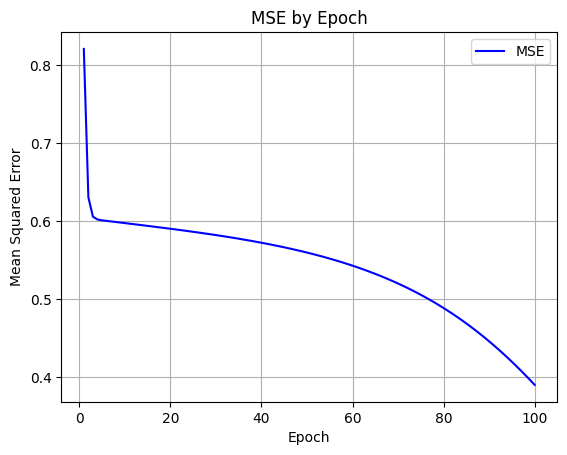

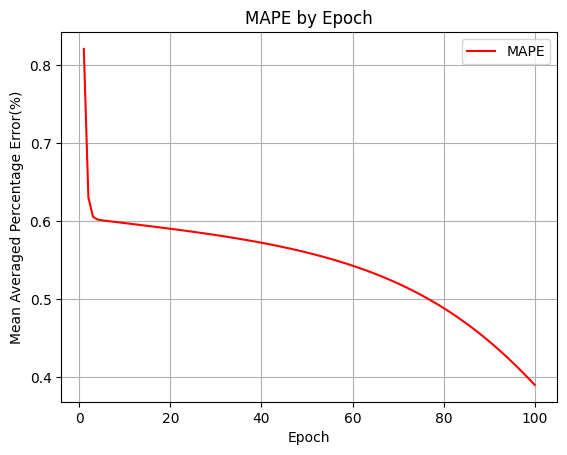

In [152]:
plt.figure()
plt.plot(np.arange(1,epochs+1), MSE_list, label='MSE', linewidth=1.5, color='b')
#plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE by Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(np.arange(1,epochs+1), MSE_list, label='MAPE', linewidth=1.5, color='r')
#plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Mean Averaged Percentage Error(%)')
plt.title('MAPE by Epoch')
plt.legend()
plt.grid(True)
plt.show()

# **문제 2) CNN**
- Data
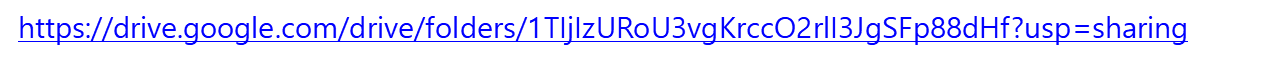

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 0,1,2,3,4, and 5 finger image data set

train_x = np.load('/content/drive/MyDrive/머신러닝/기말고사/Finger_train_img.npy')
train_y = np.load('/content/drive/MyDrive/머신러닝/기말고사/Finger_train_label.npy').reshape(-1)

test_x = np.load('/content/drive/MyDrive/머신러닝/기말고사/Finger_test_img.npy')
test_y = np.load('/content/drive/MyDrive/머신러닝/기말고사/Finger_test_label.npy').reshape(-1)

In [5]:
test_y.shape

(2022,)

데이터 불러오기

In [6]:
train_x, test_x = train_x / 255.0, test_x / 255.0 #모든 픽셀 값을 0.0~1.0 사이의 실수로 정규화 한다. (전처리)
train_x = train_x.reshape((-1, 100, 100, 1)) #tf용 reshape
test_x = test_x.reshape((-1, 100, 100, 1))

커널 설정

In [7]:
input_h = 100
input_w = 100
input_ch = 1  #입력 데이터 정보 100*100 크기, 채널 1 흑백

k1_h = 4
k1_w = 4 #커널 크기 4*4
k1_ch = 32 #커널 개수 32개 -> 첫 번째 conv+pool층에서 특징 32개를 뽑아냄. / train_x : -1,100,100,32가 됨.

p1_h = 2
p1_w = 2 #풀링 크기 2*2 이미지 크기를 절반으로 줄임. / -1,50,50,32

k2_h = 4
k2_w = 4 #커널 크기 4*4
k2_ch = 64 #커널 개수 64개 / -1,50,50,64

p2_h = 2
p2_w = 2 #풀링 크기 2*2 절반 크기로 줄임 / -1,25,25,64

conv_result_size = 25 * 25 * 64 #마지막 출력은 25,25,64 (4차원) / flatten, 40000개
n_hidden = 100 #은닉층 뉴런 100개
n_output = 6 #출력 뉴런 수 6개

가중치 설정

In [8]:
weights = {
    'conv1': tf.Variable(tf.random.normal([k1_h, k1_w, input_ch, k1_ch], stddev=0.1)), #첫 번째 conv층, 4*4 필터가 32개, weight
    'conv2': tf.Variable(tf.random.normal([k2_h, k2_w, k1_ch, k2_ch], stddev=0.1)), #두 번째 conv층, 4*4 필터가 64개, weight
    'hidden': tf.Variable(tf.random.normal([conv_result_size, n_hidden], stddev=0.1)), #conv 결과를 펼친 후 은닉층에 연결, weight
    'output': tf.Variable(tf.random.normal([n_hidden, n_output], stddev=0.1)) #출력층으로 가는 weight
}

biases = {
    'conv1': tf.Variable(tf.random.normal([k1_ch], stddev=0.1)), #뉴런 수만큼 bias 존재, 32개
    'conv2': tf.Variable(tf.random.normal([k2_ch], stddev=0.1)), #뉴런 수만큼 bias 존재, 64개
    'hidden': tf.Variable(tf.random.normal([n_hidden], stddev=0.1)), #뉴런 수만큼 bias 존재, 100개
    'output': tf.Variable(tf.random.normal([n_output], stddev=0.1)) #뉴런 수만큼 bias 존재, 6개
}
#학습 시 입력값을 받기 위한 자리
x = tf.placeholder(tf.float32, [None, input_h, input_w, input_ch]) #입력 이미지
y = tf.placeholder(tf.float32, [None, n_output]) #정답(레이블)

모델 설계

In [9]:
def net(x, weights, biases):
    conv1 = tf.nn.conv2d(x, weights['conv1'], strides=[1,1,1,1], padding='SAME') #100*100*1의 입력을 4*4*1*32의 필터가 한 칸식 움직이며 -1,100,100,32 만큼 출력함
    conv1 = tf.nn.relu(conv1 + biases['conv1']) #relu, 비선형 활성화 함수, 모든 음수를 0으로 만든다.
    maxp1 = tf.nn.max_pool2d(conv1, ksize=[1, p1_h, p1_w, 1], strides=[1, p1_h, p1_w, 1], padding='SAME') #-1,100,100,32 입력을 2*2의 커널이 2씩 움직임 / -1,50,50,32

    conv2 = tf.nn.conv2d(maxp1, weights['conv2'], strides=[1,1,1,1], padding='SAME') #같은 단계 반복, -1,50,50,64
    conv2 = tf.nn.relu(conv2 + biases['conv2'])
    maxp2 = tf.nn.max_pool2d(conv2, ksize=[1, p2_h, p2_w, 1], strides=[1, p2_h, p2_w, 1], padding='SAME') #같은 단계 반복, -1,25,25,64

    flatten = tf.reshape(maxp2, [-1, conv_result_size]) #-1,25,25,64를 flatten함
    fc1 = tf.nn.relu(tf.matmul(flatten, weights['hidden']) + biases['hidden']) #40000개의 값 각각이 100개의 출력 뉴런과 연결되어 있음, relu로 활성화
    output = tf.matmul(fc1, weights['output']) + biases['output'] #softmax를 적용하지 않은 6개의 출력값
    return output #softmax 전에 나온 생 출력값

하이퍼파라미터, 손실함수 설정

In [10]:
LR = 0.0001 #학습률, 하이퍼파라미터의 하나
pred = net(x, weights, biases) #x를 넣으면 예측 결과가 나오는 함수 작동
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y)) #softmax와 cross 엔트로피를 동시 진행, 손실 출력
optm = tf.train.AdamOptimizer(learning_rate=LR).minimize(loss) #최적화, 얼마나 빠르게 가중치를 조정할지, 가중치 업데이트 준비

학습

In [44]:
n_batch = 50 #한 번에 학습하는 데이터 수
n_iter = 1500 #전체 학습 반복 횟수
n_prt = 250 #몇 번마다 중간 결과 출력할지

sess = tf.Session() #세션을 통해 연산을 실행함
sess.run(tf.global_variables_initializer()) #초기화

loss_record_train = []
loss_record_test = []

for epoch in range(n_iter): #2500번 배치 학습
    # 랜덤 배치 생성
    batch_indices = np.random.choice(train_x.shape[0], size=n_batch, replace=False) #50개를 무작위로 샘플링 (한 번에 학습하는 데이터 수)
    batch_x = train_x[batch_indices]
    batch_y = to_categorical(train_y[batch_indices], num_classes=6)

    sess.run(optm, feed_dict={x: batch_x, y: batch_y}) #모델 학습, forward, backward, weight update, optimizer 연산

    if epoch % n_prt == 0: #2500번 중 250번 마다 중간 테스트, 진행상황 기록
        # 테스트 데이터 배치
        test_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
        test_batch_x = test_x[test_indices]
        test_batch_y = to_categorical(test_y[test_indices], num_classes=6)

        train_loss = sess.run(loss, feed_dict={x: batch_x, y: batch_y})
        test_loss = sess.run(loss, feed_dict={x: test_batch_x, y: test_batch_y})

        loss_record_train.append(train_loss)
        loss_record_test.append(test_loss)

        print("Iter : {}".format(epoch))
        print("Train Loss : {:.4f}".format(train_loss))
        print("Test Loss : {:.4f}".format(test_loss))

Iter : 0
Train Loss : 6.3969
Test Loss : 5.9177
Iter : 250
Train Loss : 0.4166
Test Loss : 0.4724
Iter : 500
Train Loss : 0.3238
Test Loss : 0.4431
Iter : 750
Train Loss : 0.3026
Test Loss : 0.5198
Iter : 1000
Train Loss : 0.1456
Test Loss : 0.5634
Iter : 1250
Train Loss : 0.1403
Test Loss : 0.6095


정확도 출력

In [64]:
test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False) #test에서 무작위 추출
test_batch_x = test_x[test_batch_indices]
test_batch_y = test_y[test_batch_indices]

test_batch_x = test_batch_x.reshape((n_batch, input_h, input_w, input_ch))  # Reshape the batch if needed
# Convert labels to one-hot encoding if necessary
test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=6)  # Adjust num_classes if needed

my_pred = sess.run(pred, feed_dict={x: test_batch_x.reshape(-1, 100, 100, 1)})
my_pred = np.argmax(my_pred, axis=1) #6개 output 중 최대값 1개 뽑기

labels = np.argmax(test_batch_y, axis=1) #레이블을 인덱스로 변환

accr = np.mean(np.equal(my_pred, labels)) #정확도 계산
print("Accuracy : {}".format(accr*100))

Accuracy : 90.0


# **문제 3) K-means clustering**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
data1 = np.array((np.random.normal(0, 0.2, 100), np.random.normal(0.0, 0.4, 100)))
data2 = np.array((np.random.normal(1.2, 0.3, 100), np.random.normal(1.1, 0.7, 100)))
data3 = np.array((np.random.normal(1.6, 0.2, 100), np.random.normal(1.8, 0.7, 100)))
data4 = np.array((np.random.normal(0.3, 0.1, 100), np.random.normal(0.5, 0.3, 100)))